In [1]:
# Google Business Store Model


from util import agg_jsonls  # helper function
from pprint import pprint
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#import seaborn as sns

import os
from collections import Counter

import nltk

from pylab import rcParams
from wordcloud import WordCloud
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rcParams['figure.figsize'] = 30, 60
%matplotlib inline

In [2]:
%cd /Users/mmikegame/repos/DS4A/SPTime19/notebooks/

/Users/mmikegame/repos/DS4A/SPTime19/notebooks


In [3]:
from util import agg_jsonls  # helper function

In [4]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("dataset/final_dataset_GB"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 149147 reviews!
{'caption': 'Ótima',
 'geo_location': {'lat': '-23.483583', 'long': '-46.6468911'},
 'id_review': 'ChZDSUhNMG9nS0VJQ0FnSUNjbXZ2SUhBEAEaFkxPUk5XOVZEWTlIRzB4TUpGcHBkTnc',
 'n_photo_user': 0,
 'n_review_user': 7,
 'rating': 5.0,
 'relative_date': 'um mês atrás',
 'retrieval_date': '2020-04-13T19:30:11Z',
 'store': 'casas-bahia',
 'url_user': 'https://www.google.com/maps/contrib/104741599272559574155?hl=pt-BR',
 'username': 'Isabel Nogueira'}


In [5]:
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 40.03%


In [6]:
pprint(caption_reviews[0:10])

[{'caption': 'Ótima',
  'geo_location': {'lat': '-23.483583', 'long': '-46.6468911'},
  'id_review': 'ChZDSUhNMG9nS0VJQ0FnSUNjbXZ2SUhBEAEaFkxPUk5XOVZEWTlIRzB4TUpGcHBkTnc',
  'n_photo_user': 0,
  'n_review_user': 7,
  'rating': 5.0,
  'relative_date': 'um mês atrás',
  'retrieval_date': '2020-04-13T19:30:11Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/104741599272559574155?hl=pt-BR',
  'username': 'Isabel Nogueira'},
 {'caption': '(Tradução do Google) Muito bom serviço, bons produtos e bons '
             'preços.  (Original) Very good service, good products and good '
             'prices.',
  'geo_location': {'lat': '-23.483583', 'long': '-46.6468911'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjd3NXS2hnRRABGhZwRE1yZ3BrUGRidU9FOVR1b2M4eENR',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 4.0,
  'relative_date': 'um mês atrás',
  'retrieval_date': '2020-04-13T19:30:11Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib

In [7]:
# Average ratings for everyone.
print('Mean ratings including reviews from anyone:')
print(f"Average overall grade of {round(np.average([i['rating'] for i in caption_reviews]),2)}, out of {len(caption_reviews)} reviews.")

# Average rates for experts. Experts are definied as users who have made more 3 reviews or more.
print('Mean ratings including reviews by experts:')
experts = [i for i in caption_reviews if (i["n_review_user"] > 2)]
print(f"Average expert grade {round(np.average([i['rating'] for i in caption_reviews if i['n_review_user'] > 2]),2)}, out of {round(len(experts),2)} reviews.")

print(f'{round((len(experts)/len(caption_reviews))*100)}% of reviews are from experts.')

Mean ratings including reviews from anyone:
Average overall grade of 3.85, out of 59708 reviews.
Mean ratings including reviews by experts:
Average expert grade 3.89, out of 15824 reviews.
27% of reviews are from experts.


In [8]:
relative_date = {
    'uma semana atrás': 7,
    'a week ago': 7,
    '2 semanas atrás': 14,
    '2 weeks ago': 14,
    '3 semanas atrás': 21, 
    '3 weeks ago': 21, 
    '4 semanas atrás': 28, 
    '4 weeks ago': 28, 
    'um mês atrás': 30,
    'a month ago': 30,
    '2 meses atrás': 60, 
    '2 months ago': 60,
    '3 meses atrás': 90, 
    '3 months ago': 90, 
    '4 meses atrás': 120,
    '4 months ago': 120,
    '5 meses atrás': 150,
    '5 months ago': 150,
    '6 meses atrás': 180, 
    '6 months ago': 180, 
    '7 meses atrás': 210, 
    '7 months ago': 210, 
    '8 meses atrás': 240, 
    '8 months ago': 240,
    '9 meses atrás': 270,
    '9 months ago': 270,
    '10 meses atrás': 300,
    '10 months ago': 300,
    '11 meses atrás': 330, 
    '11 months ago': 330, 
    'um ano atrás': 365, 
    'a year ago': 365, 
    '2 anos atrás': 730,
    '2 years ago': 730,
    '3 anos atrás': 1095, 
    '3 years ago': 1095, 
    '4 anos atrás': 1460, 
    '4 years ago': 1460, 
    '5 anos atrás': 1825, 
    '5 years ago': 1825, 
    '6 anos atrás': 2190,
    '6 years ago': 2190,
    '7 anos atrás': 2555,
    '7 years ago': 2555,
    '8 anos atrás': 2920,
    '8 years ago': 2920,
}

In [9]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

In [10]:
reviewsGB[0]

{'id_review': 'ChZDSUhNMG9nS0VJQ0FnSUNjbXZ2SUhBEAEaFkxPUk5XOVZEWTlIRzB4TUpGcHBkTnc',
 'caption': 'Ótima',
 'relative_date': 'um mês atrás',
 'retrieval_date': '2020-04-13T19:30:11Z',
 'rating': 5.0,
 'username': 'Isabel Nogueira',
 'n_review_user': 7,
 'n_photo_user': 0,
 'url_user': 'https://www.google.com/maps/contrib/104741599272559574155?hl=pt-BR',
 'geo_location': {'lat': '-23.483583', 'long': '-46.6468911'},
 'store': 'casas-bahia'}

In [11]:
comment_day(reviewsGB[0])

datetime.datetime(2020, 3, 14, 19, 30, 11)

In [12]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

def format_GB_to_df(review):
    cols_for_df = ['caption', 'geo_location', 'id_review' , 'n_photo_user', 'n_review_user', 
                   'rating' , 'relative_date', 'retrieval_date', 'store', 'url_user', 'username']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["len_comment"] = len(review['caption'])
    r_cp["relative"] = relative_date[review['relative_date']]
    r_cp["date_comment"] = comment_day(review)
    return r_cp

In [13]:
df = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
df.head()

,caption,geo_location,id_review,n_photo_user,n_review_user,rating,relative_date,retrieval_date,store,url_user,username,len_comment,relative,date_comment
0,Ótima,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSUNjbXZ2SUhBEAEaFkxPUk5XOV...,0,7,5.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1047415992...,Isabel Nogueira,5,30,2020-03-14 19:30:11
1,"(Tradução do Google) Muito bom serviço, bons p...","{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSUNjd3NXS2hnRRABGhZwRE1yZ3...,0,0,4.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1155360152...,Mac Guitars,130,30,2020-03-14 19:30:11
2,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSUNjOExiOGRnEAEaFjJSaFB5aW...,0,1,3.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1140968320...,Tiago Leonel Barreto,0,30,2020-03-14 19:30:11
3,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzaGZ5SHJ3RRABGhYzeDJiSG...,0,0,3.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1165777418...,robson desiderio,0,30,2020-03-14 19:30:11
4,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzcXVfWjlRRRABGhZFZHNLZH...,0,0,5.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1123043389...,Marluce Pinho Bragança Souza,0,30,2020-03-14 19:30:11


In [14]:
df[df.rating < 4].head()

,caption,geo_location,id_review,n_photo_user,n_review_user,rating,relative_date,retrieval_date,store,url_user,username,len_comment,relative,date_comment
2,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSUNjOExiOGRnEAEaFjJSaFB5aW...,0,1,3.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1140968320...,Tiago Leonel Barreto,0,30,2020-03-14 19:30:11
3,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzaGZ5SHJ3RRABGhYzeDJiSG...,0,0,3.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1165777418...,robson desiderio,0,30,2020-03-14 19:30:11
5,Como na maioria das lojas os funcionarios pare...,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSURzeW96OUtBEAEaFmZtdUVESl...,0,0,2.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1072188182...,Chaveiro magia das chaves,73,30,2020-03-14 19:30:11
8,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzb29yaDZ3RRABGhZwYnhNd2...,0,0,1.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1036963921...,Fabiana Angelo,0,30,2020-03-14 19:30:11
15,,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzZ0tIRW1BRRABGhZfUjlxbl...,0,0,2.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1157404583...,Edvaldo Barbosa Sobrinho,0,30,2020-03-14 19:30:11


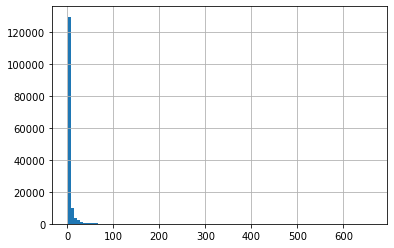

In [15]:
# Histogram of GB review length (in words):
words_per_review = df.caption.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)

In [16]:
#Mean words per GB review:
words_per_review.mean()

4.5297324116475695

5.0    46.567480
4.0    23.250216
3.0    16.389200
1.0     8.383005
2.0     5.410099
Name: rating, dtype: float64

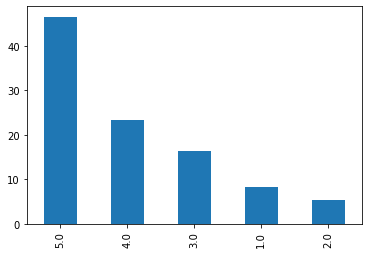

In [17]:
# Percentage breakdown of 5* through 1* reviews:
ratings_pct = df.rating.value_counts()/df.shape[0]*100
ratings_pct.plot.bar()
ratings_pct

In [18]:
# Classifying poor reviews:
print('Percentage of poor reviews: ', round(len(df[df.rating < 4])/len(df)*100, 2),'%')
print('Percentage of horrible reviews: ', round(len(df[df.rating < 3])/len(df)*100, 2),'%')

Percentage of poor reviews:  30.18 %
Percentage of horrible reviews:  13.79 %


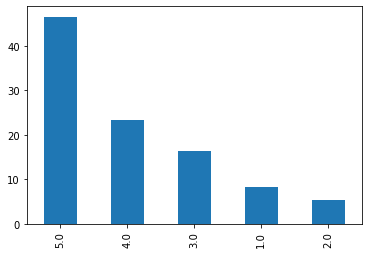

In [19]:
# Reviews by all:
ratings_pct_all = df.rating.value_counts()/df.shape[0]*100
ratings_pct_all.plot.bar()

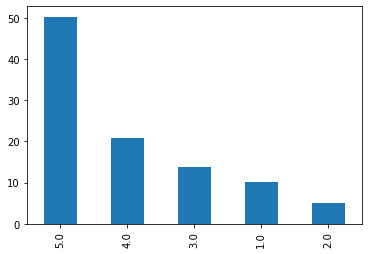

In [20]:
# Reviews by experts:
percentage_ratings_experts = round(df[df.n_review_user > 1].rating.value_counts()/df[df.n_review_user > 1].shape[0]*100,2)
percentage_ratings_experts.plot.bar()

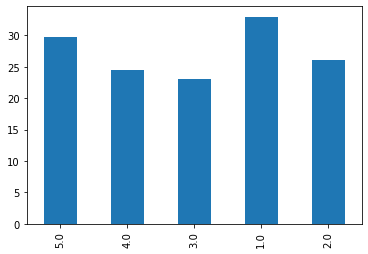

In [21]:
# Participation of experts per PER RATING:
participation_expert_per_ratings = round(df[df.n_review_user > 1].rating.value_counts()/df.rating.value_counts()*100,2)
participation_expert_per_ratings.plot.bar()

237092


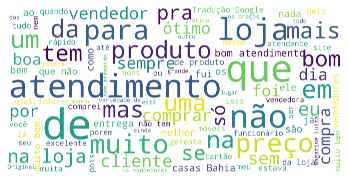

In [22]:
# Overall Wordcloud
word_cloud_text = ''.join(df.caption[:10000])
print(len(word_cloud_text))
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

146701


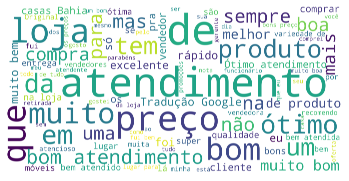

In [23]:
# Wordcloud for Promoters (rating >= 4)
word_cloud_text = ''.join(df[df.rating >= 4].caption[:10000])
print(len(word_cloud_text))
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

372913


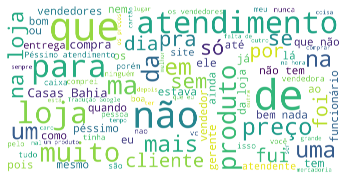

In [24]:
# Wordcloud for Detractors (rating <= 2)
word_cloud_text = ''.join(df[df.rating <= 3].caption[:10000])
print(len(word_cloud_text))
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

In [25]:
dff = pd.DataFrame([format_GB_to_df(row) for row in caption_reviews]) 
dff.head()

,caption,geo_location,id_review,n_photo_user,n_review_user,rating,relative_date,retrieval_date,store,url_user,username,len_comment,relative,date_comment
0,Ótima,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSUNjbXZ2SUhBEAEaFkxPUk5XOV...,0,7,5.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1047415992...,Isabel Nogueira,5,30,2020-03-14 19:30:11
1,"(Tradução do Google) Muito bom serviço, bons p...","{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSUNjd3NXS2hnRRABGhZwRE1yZ3...,0,0,4.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1155360152...,Mac Guitars,130,30,2020-03-14 19:30:11
2,Como na maioria das lojas os funcionarios pare...,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSURzeW96OUtBEAEaFmZtdUVESl...,0,0,2.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1072188182...,Chaveiro magia das chaves,73,30,2020-03-14 19:30:11
3,Bom atendimento.,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChZDSUhNMG9nS0VJQ0FnSURzMHFPLUZnEAEaFjhTS1Bzbk...,0,0,4.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1140112986...,Eneida Alves Regado,16,30,2020-03-14 19:30:11
4,Ótimo lugar,"{'lat': '-23.483583', 'long': '-46.6468911'}",ChdDSUhNMG9nS0VJQ0FnSURzbUl6bTJRRRABGhZwcWJEYm...,0,0,5.0,um mês atrás,2020-04-13T19:30:11Z,casas-bahia,https://www.google.com/maps/contrib/1081586006...,Fabio Rodrigues Alves,11,30,2020-03-14 19:30:11


In [26]:
dff['Sentiment_rating'] = np.where(dff.rating > 3, 1, 0)
dff['Sentiment_rating'].value_counts()

1    40464
0    19244
Name: Sentiment_rating, dtype: int64

In [27]:
# Removing neutral reviews 
dff = dff[dff.rating != 3]
dff['Sentiment_rating'].value_counts()

1    40464
0    10503
Name: Sentiment_rating, dtype: int64

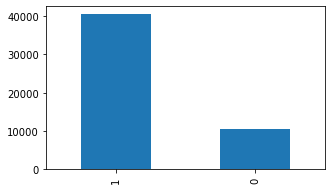

In [28]:
rcParams['figure.figsize'] = 5, 3
dff.Sentiment_rating.value_counts().plot.bar()

### Pre-processing

In [29]:
# Backing up database first
caption_backup = dff.caption.copy()

In [30]:
# Converting words to lower case.
dff['pp_caption'] = dff.caption.apply(lambda x: x.lower())

In [31]:
nltk.download('punkt')

token_lists = [word_tokenize(each) for each in dff.caption]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ", len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in dff.pp_caption]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ", len(set(tokens_lower)))

[nltk_data] Downloading package punkt to /Users/mmikegame/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of unique tokens then:  24891
Number of unique tokens now:  20430


In [32]:
# Selecting non alpha numeric charactes that are not spaces
special_chars = dff.pp_caption.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# Getting list of list into a single list
flat_list = [item for sublist in special_chars for item in sublist]

# Unique special characters
print(set(flat_list))

{'💙', '👌', '💟', '🙀', '☕', '🤛', '🙏', '💛', '👎', '😫', '😭', '😪', '😤', '💖', '🏾', '✌', '🤬', '📯', '️', '☹', '.', '😅', '🤑', '&', '😚', '😥', '💚', '😞', '🙊', '-', '😄', '📺', '🔝', '\\', '🙄', '😝', '🕪', '🙂', '😕', '/', '#', '!', '📗', '💲', '💸', '🙈', '\xa0', '🤓', '%', '🤷', '°', '🏬', '👿', '🏃', '💯', '😉', '🇧', '🍀', '🙌', '❗', '🎵', '😬', '♡', '♀', '💩', '🍦', '😀', '🎧', '🥳', '👀', '🚗', '👍', '🤙', '😎', '🤩', '🎁', '💋', '☺', '🤔', '“', '🍭', '😒', '😠', '♿', '💝', '🖕', '🍿', '🏳', '^', '🎈', '¥', '❤', '⁉', '—', '\u200b', '💓', '✨', '´', '😜', '😃', '[', '😏', '💫', '🤡', '⛄', '×', '😰', '🗄', '，', '🚶', '🥺', '✓', '(', '🤜', '🇾', '👏', '💵', '😍', '🐞', '👋', '☆', '🖒', '*', '=', '🏆', '<', '🆗', '😈', '>', ':', '🤦', '\u200d', '🥰', '❣', '😖', '🏼', '💜', '💣', '…', '🏻', '🌟', '"', '🍹', '😯', '😡', '🛍', '☠', '👹', '🤲', ']', '🙇', ';', '😐', '🤗', '😁', '🤨', '💀', '|', '🏿', '🍃', '🛌', '✔', ',', '–', '😑', '🌻', '🤢', '✊', '👉', '+', '🎄', '♂', "'", '🤪', '😢', '@', '📱', '🙉', '🏠', '🌹', '🏽', '_', '😱', ')', '🤫', '😘', '’', '⬇', '♥', '😆', '🎤', '£', '😂', '§', '¡', '💞', '😧', 

In [33]:
import unicodedata

def remove_diacritics(text):
    """
    Returns a string with all diacritics (aka non-spacing marks) removed.
    For example "Héllô" will become "Hello".
    Useful for comparing strings in an accent-insensitive fashion.
    From: https://stackoverflow.com/questions/35783135/regex-match-a-character-and-all-its-diacritic-variations-aka-accent-insensiti
    """
    normalized = unicodedata.normalize("NFKD", text)
    return "".join(c for c in normalized if unicodedata.category(c) != "Mn")

In [34]:
# Remove diacritics
dff.pp_caption = dff.pp_caption.apply(remove_diacritics)

In [35]:
caption_backup[1]

'(Tradução do Google) Muito bom serviço, bons produtos e bons preços.  (Original) Very good service, good products and good prices.'

In [36]:
dff.pp_caption[1]

'(traducao do google) muito bom servico, bons produtos e bons precos.  (original) very good service, good products and good prices.'

In [37]:
token_lists = [word_tokenize(each) for each in dff.caption]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ", len(set(tokens)))

token_lists = [word_tokenize(each) for each in dff.pp_caption]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ", len(set(tokens)))

Number of unique tokens then:  24891
Number of unique tokens now:  19665


### Stopwords and Hi/Low Frequency words

In [38]:
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
port_stop_words = stopwords_corpus.words('portuguese')
noise_words.extend(port_stop_words)
print(len(noise_words))
noise_words

204


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mmikegame/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [39]:
# Most frequent stopwords
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:10]

[('.', 21707),
 (',', 21447),
 ('e', 20475),
 ('de', 13355),
 ('atendimento', 12570),
 ('bom', 11034),
 ('o', 10205),
 ('a', 10041),
 ('muito', 9393),
 ('loja', 9386)]

### Stemming and Lemmatization

In [40]:
from port_stemmer import RSLPStemmer
nltk.download('rslp')

[nltk_data] Downloading package rslp to /Users/mmikegame/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [41]:
st = RSLPStemmer()
# opening lines of Erico Verissimo's "Música ao Longe"
text = '''
    Clarissa risca com giz no quadro-negro a paisagem que os alunos
    devem copiar . Uma casinha de porta e janela , em cima duma
    coxilha .'''

for token in text.split():
    print(st.stem(token))

clariss
risc
com
giz
no
quadro-negr
a
pais
que
os
alun
dev
copi
.
uma
cas
de
port
e
janel
,
em
cim
dum
coxilh
.


## Building the Machine Learning Model

In [42]:
dff[['pp_caption','rating','Sentiment_rating']].head(5)

,pp_caption,rating,Sentiment_rating
0,otima,5.0,1
1,"(traducao do google) muito bom servico, bons p...",4.0,1
2,como na maioria das lojas os funcionarios pare...,2.0,0
3,bom atendimento.,4.0,1
4,otimo lugar,5.0,1


In [43]:
# Creating a method for stemming
stemmer = RSLPStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [44]:
# Creating a python object of the class CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 1)
)

In [45]:
reviews_train, reviews_test = train_test_split(dff, test_size=0.2, random_state=0)

In [46]:
X_train_bow = bow_counts.fit_transform(reviews_train.pp_caption)
X_test_bow = bow_counts.transform(reviews_test.pp_caption)

In [47]:
y_train_bow = reviews_train['Sentiment_rating']
y_test_bow = reviews_test['Sentiment_rating']

In [48]:
y_test_bow.value_counts() / y_test_bow.shape[0]

1    0.792035
0    0.207965
Name: Sentiment_rating, dtype: float64

### Logistic Regression

In [49]:
# Training the model 
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(X_train_bow, y_train_bow)

# Predicting the output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.9571662919982988
Accuracy:  93.08416715715127


In [50]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [51]:
predictions = pd.DataFrame()
predictions['caption'] = reviews_test['caption']
predictions['Actual_rating'] = reviews_test['rating']
predictions['Sentiment_rating'] = reviews_test['Sentiment_rating']
predictions['Predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [52]:
predictions.head(10)

,caption,Actual_rating,Sentiment_rating,Predicted_sentiment,Predicted_probability
41897,Fui até a loja para adquirir um aparelho de ce...,4.0,1,1,0.948373
22874,Bom,5.0,1,1,0.970303
30418,Sempre acho algo bacana,5.0,1,1,0.994725
27520,Funcionários atenciosos.,5.0,1,1,0.937451
54642,(Tradução do Google) Topo (Original) Top,5.0,1,1,0.990116
13295,Custo x benefício e condições de pagamento mu...,5.0,1,1,0.985410
7434,"Atendimento nota 10, ao menos eu gostei.",5.0,1,1,0.957086
53211,"Pedi informação ao representante Robert, da Sa...",5.0,1,1,0.994265
28675,"Atendimento excelente, rapidez na entrega!",4.0,1,1,0.996653
41477,Atendimento péssimo,1.0,0,0,0.029050


In [53]:
accuracy_score(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

0.9308416715715127

In [54]:
# Singling out actual vs. predicted discrepancies

predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].sort_values(by=["Predicted_probability"]).head(3)

,caption,Actual_rating,Sentiment_rating,Predicted_sentiment,Predicted_probability
45450,"Já fui bem atendido anteriormente, mas na últi...",4.0,1,0,1.542245e-10
11091,"Sou Cliente há pelo menos 20 anos,. Tive todos...",4.0,1,0,2.953802e-08
51437,"Eu fui ver os preços, mais não comprei nada. N...",5.0,1,0,3.975776e-08


In [55]:
predictions.loc[11091].values

array(['Sou Cliente há pelo menos 20 anos,. Tive todos os meus celulares comprados na Casa Bahia (com excessão do Baby, do Peg & Fale e os da era analógica 😂). Como já conheço alguns vendedores das lojas da Lapa e Perus, até o ano passado ligava antes para conferir se a loja tinha o meu produto e ía até lá comprar, já que no horário que eu saio do trabalho, a loja já está quase fechando. Este ano não foi diferente. Já tinha vendido o celular antigo e precisava comprar outro. Liguei seguidamente por 3 dias nas duas lojas e nada de atenderem. Por fim, no meio do trajeto prá casa passei na loja da Praça Ramos, mas lá não tinha o meu aparelho. Comentei com o  vendedor que estava tentando ligar e ele disse prá esquecer, porque tem loja que não atende. Bom, eu entendo que se não atende é porque não quer tirar dúvidas do cliente. Se é assim, então não quer vender.',
       4.0, 1, 0, 2.9538022920135312e-08], dtype=object)

#### Improved model with n-grams where 1 < n < 4 and stopwords

In [56]:
# Changes with respect to the previous code
# 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram,3-gram and 4-gram)
# 2. Including the stopwords in the bag of words features
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
X_train_bow = bow_counts.fit_transform(reviews_train.pp_caption)
X_test_bow = bow_counts.transform(reviews_test.pp_caption)

In [57]:
# Training the model 
lr_model_all_new = LogisticRegression(C=0.9, solver="liblinear")
lr_model_all_new.fit(X_train_bow, y_train_bow)
# Predicting the output
test_pred_lr_prob_new = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all_new = lr_model_all_new.predict(X_test_bow)
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all_new))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all_new) * 100)

F1 score:  0.9575750197820926
Accuracy:  93.16264469295665


Accuracy increased only slightly from 93.08% to 93.16%.

#### Listing best and worst ranked keywords

In [58]:
lr_weights = pd.DataFrame(list(
    zip(
        bow_counts.get_feature_names(),
        lr_model_all_new.coef_[0])
    ),
    columns=['words','weights']
)
lr_weights.sort_values(['weights'],ascending = False)[:15]

,words,weights
473294,otimo,2.947844
298205,excelente,2.895841
472057,otima,2.700882
80483,adoro,2.362576
475073,otimos,2.251091
562401,rapido,2.207546
89792,amei,2.179035
137351,bons,2.159249
359775,legal,1.897025
106353,atenciosos,1.871666


In [59]:
lr_weights.sort_values(['weights'],ascending = False)[-15:]

,words,weights
515059,poucas,-2.004403
430476,nao gosto,-2.230299
145385,caro,-2.237878
449603,nunca,-2.292535
504546,pior,-2.297368
514901,pouca,-2.469240
430304,nao gostei,-2.552915
420697,n,-2.782421
426058,nao,-2.819343
384400,mal,-3.032929


### Random Forest Model

In [60]:
rf_model_all = RandomForestClassifier(n_estimators=100, verbose=3, n_jobs=-1)
# Training the data
rf_model_all.fit(X_train_bow, y_train_bow)
# Generating predictions
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.1min


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 24.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.4s finished


In [61]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.9484770510442224
Accuracy:  91.55385520894644


Accuracy with Random Forests has decreased.

In [62]:
feature_importances = pd.DataFrame(
    rf_model_all.feature_importances_,
    index=bow_counts.get_feature_names(),
    columns=['importance']
)

In [63]:
feature_importances.sort_values(['importance'], ascending=False)[:10]

,importance
pessimo,0.045239
nao,0.025915
ruim,0.018331
pessimo atendimento,0.017608
pessima,0.010839
bom,0.008392
caro,0.007460
mal,0.007199
horrivel,0.007026
atendimento pessimo,0.005143


### TF-IDF Model

In [64]:
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1,1)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.pp_caption)
X_test_tfidf = tfidf_counts.transform(reviews_test.pp_caption)

In [65]:
# Create the classifier
lr_model_tf_idf = LogisticRegression(solver="liblinear")

# Train the classifier
lr_model_tf_idf.fit(X_train_tfidf, y_train_bow)

# Predict the results
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.9543548289065824
Accuracy:  92.63292132627036


In [66]:
# Changes: Removing stop words and including 1-4 grams in the tf-idf data
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
X_train_tfidf = tfidf_counts.fit_transform(reviews_train.pp_caption)
X_test_tfidf = tfidf_counts.transform(reviews_test.pp_caption)

In [67]:
# Setting up the model class
lr_model_tf_idf_new = LogisticRegression(solver="liblinear", penalty='l1', C=10)
# Training the model 
lr_model_tf_idf_new.fit(X_train_tfidf, y_train_bow)
# Prediciting the results
test_pred_lr_prob = lr_model_tf_idf_new.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf_new.predict(X_test_tfidf)
# valuating the model`
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all)*100)

F1 score:  0.9563224087726907
Accuracy:  93.08416715715127


In [68]:
lr_weights = pd.DataFrame(
    list(
        zip(tfidf_counts.get_feature_names(), lr_model_tf_idf_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:10]

,words,weights
80483,adoro,32.035063
465700,"opcoes , precos",30.481594
639603,um pouco,29.957099
323558,fui muito bem,29.872370
562401,rapido,29.649156
473654,"otimo atendimento ,",28.034023
324744,funcionaria de,27.775685
450180,nunca tive,26.614775
600979,so nao,25.032008
346016,infelizmente hoje,24.037468


In [69]:
lr_weights.sort_values(['weights'],ascending = False)[-10:]

,words,weights
220645,desorganizada,-26.965804
426058,nao,-27.058790
449603,nunca,-27.341239
358805,lamentavel,-27.679463
672863,zero,-27.820396
501427,"pessimo ,",-31.335742
384400,mal,-32.779542
504546,pior,-37.242329
501875,"pessimo atendimento ,",-40.003836
364168,lixo,-46.534486


# Saving prediction models

In [70]:
import pickle

In [71]:
#Saving Logistic Regression Model
filename = 'logistic_regression.sav'
pickle.dump(lr_model_all, open(filename, 'wb'))

In [72]:
#Saving Logistic Regression n-grams Model
filename = 'logistic_regression_n-grams.sav'
pickle.dump(lr_model_all_new, open(filename, 'wb'))

In [73]:
#Saving Logistic Regression n-grams Model
filename = 'random_forest.sav'
pickle.dump(rf_model_all, open(filename, 'wb'))

In [74]:
#Saving Logistic Regression n-grams Model
filename = 'tf_idf.sav'
pickle.dump(lr_model_tf_idf, open(filename, 'wb'))

# Conclusions

Logistic Regression with 1-4 n-grams has performed the best @ 93,16% accuracy.